In [1]:
import pandas as pd
import yfinance as yf
from itables import init_notebook_mode


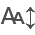

In [2]:
init_notebook_mode(all_interactive=True)

In [3]:

fuel_stock = yf.download("CL=F", start="2003-12-31", end="2025-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [4]:

fuel_df = fuel_stock['Close'].reset_index()

In [5]:
fuel_df


Ticker       Date       CL=F
0      2003-12-31  32.520000
1      2004-01-05  33.779999
2      2004-01-06  33.700001
3      2004-01-07  33.619999
4      2004-01-08  33.980000
...           ...        ...
5275   2024-12-24  70.099998
5276   2024-12-26  69.620003
5277   2024-12-27  70.599998
5278   2024-12-30  70.989998
5279   2024-12-31  71.720001

[5280 rows x 2 columns]

In [6]:
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'])
fuel_df

Ticker       Date       CL=F
0      2003-12-31  32.520000
1      2004-01-05  33.779999
2      2004-01-06  33.700001
3      2004-01-07  33.619999
4      2004-01-08  33.980000
...           ...        ...
5275   2024-12-24  70.099998
5276   2024-12-26  69.620003
5277   2024-12-27  70.599998
5278   2024-12-30  70.989998
5279   2024-12-31  71.720001

[5280 rows x 2 columns]

In [7]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5280 non-null   datetime64[ns]
 1   CL=F    5280 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 82.6 KB


In [8]:
exchange = yf.download("PLN=X", start="2003-12-31", end="2025-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [9]:
exchange_df = exchange['Close'].reset_index()
exchange_df

Ticker       Date     PLN=X
0      2003-12-31  3.731300
1      2004-01-01  3.725700
2      2004-01-02  3.735900
3      2004-01-05  3.683600
4      2004-01-06  3.645700
...           ...       ...
5445   2024-12-25  4.087380
5446   2024-12-26  4.088420
5447   2024-12-27  4.088500
5448   2024-12-30  4.092367
5449   2024-12-31  4.107070

[5450 rows x 2 columns]

In [10]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5450 entries, 0 to 5449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5450 non-null   datetime64[ns]
 1   PLN=X   5450 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.3 KB


In [11]:
# Tworzenie pełnej listy dat z zakresu
full_dates = pd.date_range(start='2004-01-01', end='2024-12-31', freq='D')
# Utworzenie DataFrame z pełnym zakresem dat w indeksie
full_df = pd.DataFrame({'Date' : full_dates})

In [12]:
len(full_df)

7671

In [13]:
full_df

Date
Loading ITables v2.2.4 from the init_notebook_mode cell... (need help?)


In [14]:
df_combined = pd.merge(full_df, fuel_df, on='Date', how='left')

In [15]:
df_combined


Date       CL=F
0    2004-01-01        NaN
1    2004-01-02        NaN
2    2004-01-03        NaN
3    2004-01-04        NaN
4    2004-01-05  33.779999
...         ...        ...
7666 2024-12-27  70.599998
7667 2024-12-28        NaN
7668 2024-12-29        NaN
7669 2024-12-30  70.989998
7670 2024-12-31  71.720001

[7671 rows x 2 columns]

In [16]:
fuel_exch_df = pd.merge(df_combined, exchange_df, on='Date', how='left')

In [17]:
fuel_exch_df

Date       CL=F     PLN=X
0    2004-01-01        NaN  3.725700
1    2004-01-02        NaN  3.735900
2    2004-01-03        NaN       NaN
3    2004-01-04        NaN       NaN
4    2004-01-05  33.779999  3.683600
...         ...        ...       ...
7666 2024-12-27  70.599998  4.088500
7667 2024-12-28        NaN       NaN
7668 2024-12-29        NaN       NaN
7669 2024-12-30  70.989998  4.092367
7670 2024-12-31  71.720001  4.107070

[7671 rows x 3 columns]

In [18]:
# Wypełnianie brakujących wartości wartością poprzedzającą
fuel_exch_df['CL=F'] = fuel_exch_df['CL=F'].fillna(method='ffill')
fuel_exch_df['PLN=X'] = fuel_exch_df['PLN=X'].fillna(method='ffill')

C:\Users\user\AppData\Local\Temp\ipykernel_14180\3197992100.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fuel_exch_df['CL=F'] = fuel_exch_df['CL=F'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_14180\3197992100.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fuel_exch_df['PLN=X'] = fuel_exch_df['PLN=X'].fillna(method='ffill')


In [19]:
# Wypełnianie brakujących wartości wartością następującą (bo nie było poprzedzającej)
fuel_exch_df['CL=F'] = fuel_exch_df['CL=F'].fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_14180\1115174642.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fuel_exch_df['CL=F'] = fuel_exch_df['CL=F'].fillna(method='bfill')


In [20]:
fuel_exch_df

Date       CL=F     PLN=X
0    2004-01-01  33.779999  3.725700
1    2004-01-02  33.779999  3.735900
2    2004-01-03  33.779999  3.735900
3    2004-01-04  33.779999  3.735900
4    2004-01-05  33.779999  3.683600
...         ...        ...       ...
7666 2024-12-27  70.599998  4.088500
7667 2024-12-28  70.599998  4.088500
7668 2024-12-29  70.599998  4.088500
7669 2024-12-30  70.989998  4.092367
7670 2024-12-31  71.720001  4.107070

[7671 rows x 3 columns]

In [21]:
fuel_exch_df.isna().sum()

Date     0
CL=F     0
PLN=X    0
dtype: int64

In [22]:
plik = "Orlen_columns.xls"
eurosuper_df = pd.read_excel(plik, sheet_name='Benzyna_bezołowiowa-Eurosuper95')

In [23]:
eurosuper_df.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'super95'}, inplace=True)

In [24]:
ekodiesel_df = pd.read_excel(plik, sheet_name='Olej_napędowy-Ekodiesel')

In [25]:
ekodiesel_df

Unnamed: 0 Unnamed: 1  Unnamed: 2
0            NaN 2004-01-01        2165
1            NaN 2004-01-21        2208
2            NaN 2004-01-24        2159
3            NaN 2004-01-30        2117
4            NaN 2004-02-03        2154
...          ...        ...         ...
4797         NaN 2024-12-21        4878
4798         NaN 2024-12-24        4867
4799         NaN 2024-12-25        4867
4800         NaN 2024-12-28        4879
4801         NaN 2024-12-31        4910

[4802 rows x 3 columns]

In [26]:
ekodiesel_df['Unnamed: 1'] = pd.to_datetime(ekodiesel_df['Unnamed: 1'])

In [27]:
ekodiesel_df.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'diesel'}, inplace=True)

In [28]:
ekodiesel_df

Unnamed: 0       Date  diesel
0            NaN 2004-01-01    2165
1            NaN 2004-01-21    2208
2            NaN 2004-01-24    2159
3            NaN 2004-01-30    2117
4            NaN 2004-02-03    2154
...          ...        ...     ...
4797         NaN 2024-12-21    4878
4798         NaN 2024-12-24    4867
4799         NaN 2024-12-25    4867
4800         NaN 2024-12-28    4879
4801         NaN 2024-12-31    4910

[4802 rows x 3 columns]

In [29]:
diesel_df = pd.merge(fuel_exch_df, ekodiesel_df, on='Date', how='left')

In [30]:
diesel_df

Date       CL=F     PLN=X  Unnamed: 0  diesel
0    2004-01-01  33.779999  3.725700         NaN  2165.0
1    2004-01-02  33.779999  3.735900         NaN     NaN
2    2004-01-03  33.779999  3.735900         NaN     NaN
3    2004-01-04  33.779999  3.735900         NaN     NaN
4    2004-01-05  33.779999  3.683600         NaN     NaN
...         ...        ...       ...         ...     ...
7666 2024-12-27  70.599998  4.088500         NaN     NaN
7667 2024-12-28  70.599998  4.088500         NaN  4879.0
7668 2024-12-29  70.599998  4.088500         NaN     NaN
7669 2024-12-30  70.989998  4.092367         NaN     NaN
7670 2024-12-31  71.720001  4.107070         NaN  4910.0

[7671 rows x 5 columns]

In [31]:
data_df = pd.merge(diesel_df, eurosuper_df, on='Date', how='left')
data_df

Date       CL=F     PLN=X  Unnamed: 0_x  diesel  Unnamed: 0_y  \
0    2004-01-01  33.779999  3.725700           NaN  2165.0           NaN   
1    2004-01-02  33.779999  3.735900           NaN     NaN           NaN   
2    2004-01-03  33.779999  3.735900           NaN     NaN           NaN   
3    2004-01-04  33.779999  3.735900           NaN     NaN           NaN   
4    2004-01-05  33.779999  3.683600           NaN     NaN           NaN   
...         ...        ...       ...           ...     ...           ...   
7666 2024-12-27  70.599998  4.088500           NaN     NaN           NaN   
7667 2024-12-28  70.599998  4.088500           NaN  4879.0           NaN   
7668 2024-12-29  70.599998  4.088500           NaN     NaN           NaN   
7669 2024-12-30  70.989998  4.092367           NaN     NaN           NaN   
7670 2024-12-31  71.720001  4.107070           NaN  4910.0           NaN   

      super95  
0      2533.0  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
7666      NaN  
7667   4692.0  
7668      NaN  
7669      NaN  
7670   4705.0  

[7671 rows x 7 columns]

In [32]:
data_df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [33]:
data_df

Date       CL=F     PLN=X  diesel  super95
0    2004-01-01  33.779999  3.725700  2165.0   2533.0
1    2004-01-02  33.779999  3.735900     NaN      NaN
2    2004-01-03  33.779999  3.735900     NaN      NaN
3    2004-01-04  33.779999  3.735900     NaN      NaN
4    2004-01-05  33.779999  3.683600     NaN      NaN
...         ...        ...       ...     ...      ...
7666 2024-12-27  70.599998  4.088500     NaN      NaN
7667 2024-12-28  70.599998  4.088500  4879.0   4692.0
7668 2024-12-29  70.599998  4.088500     NaN      NaN
7669 2024-12-30  70.989998  4.092367     NaN      NaN
7670 2024-12-31  71.720001  4.107070  4910.0   4705.0

[7671 rows x 5 columns]

In [34]:
# Wypełnianie brakujących wartości wartością poprzedzającą
data_df['diesel'] = data_df['diesel'].fillna(method='ffill')
data_df['super95'] = data_df['super95'].fillna(method='ffill')
data_df

C:\Users\user\AppData\Local\Temp\ipykernel_14180\907959541.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['diesel'] = data_df['diesel'].fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_14180\907959541.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_df['super95'] = data_df['super95'].fillna(method='ffill')


Date       CL=F     PLN=X  diesel  super95
0    2004-01-01  33.779999  3.725700  2165.0   2533.0
1    2004-01-02  33.779999  3.735900  2165.0   2533.0
2    2004-01-03  33.779999  3.735900  2165.0   2533.0
3    2004-01-04  33.779999  3.735900  2165.0   2533.0
4    2004-01-05  33.779999  3.683600  2165.0   2533.0
...         ...        ...       ...     ...      ...
7666 2024-12-27  70.599998  4.088500  4867.0   4674.0
7667 2024-12-28  70.599998  4.088500  4879.0   4692.0
7668 2024-12-29  70.599998  4.088500  4879.0   4692.0
7669 2024-12-30  70.989998  4.092367  4879.0   4692.0
7670 2024-12-31  71.720001  4.107070  4910.0   4705.0

[7671 rows x 5 columns]

In [35]:
# data_df.to_csv('fuel_data.csv', index=False)

In [36]:
data_df.columns=['data', 'ropa', 'kurs', 'diesel', 'benzyna']
data_df.dtypes

data       datetime64[ns]
ropa              float64
kurs              float64
diesel            float64
benzyna           float64
dtype: object

In [37]:
data_df['zmiana_ropa'] = data_df['ropa'].pct_change()  # Zmiana procentowa ceny ropy
data_df['zmiana_kurs'] = data_df['kurs'].pct_change()  # Zmiana procentowa kursu USD/PLN
data_df['zmiana_benzyna'] = data_df['benzyna'].pct_change()  # Zmiana procentowa ceny benzyny

# Obliczenie korelacji pomiędzy tymi trzema zmiennymi
korelacja = data_df[['zmiana_ropa', 'zmiana_kurs', 'zmiana_benzyna']].corr()

print(korelacja)

                zmiana_ropa  zmiana_kurs  zmiana_benzyna
zmiana_ropa        1.000000    -0.047611        0.012931
zmiana_kurs       -0.047611     1.000000        0.006745
zmiana_benzyna     0.012931     0.006745        1.000000


In [38]:
# Obliczenie korelacji w oknie 30-dniowym
window_size = 30
correlation_series = []

for i in range(window_size, len(data_df)):
    # Wybór okna 30-dniowego
    window_data = data_df.iloc[i-window_size:i]
    # Obliczenie korelacji między zmiennymi
    correlation = window_data[['zmiana_ropa', 'zmiana_kurs']].corrwith(window_data['zmiana_benzyna']).mean()
    correlation_series.append(correlation)

# Tworzymy serię korelacji z wartościami w oknach
correlation_series = pd.Series(correlation_series, index=data_df.index[window_size:])




c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\conda\envs\fuel_price\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: in

In [39]:
max_correlation_idx = correlation_series.idxmax()
max_correlation_value = correlation_series.max()

print(f"Najwyższa korelacja wystąpiła w oknie, które kończy się na dacie: {max_correlation_idx}")
print(f"Najwyższa korelacja: {max_correlation_value}")

Najwyższa korelacja wystąpiła w oknie, które kończy się na dacie: 5908
Najwyższa korelacja: 0.4941004923390553


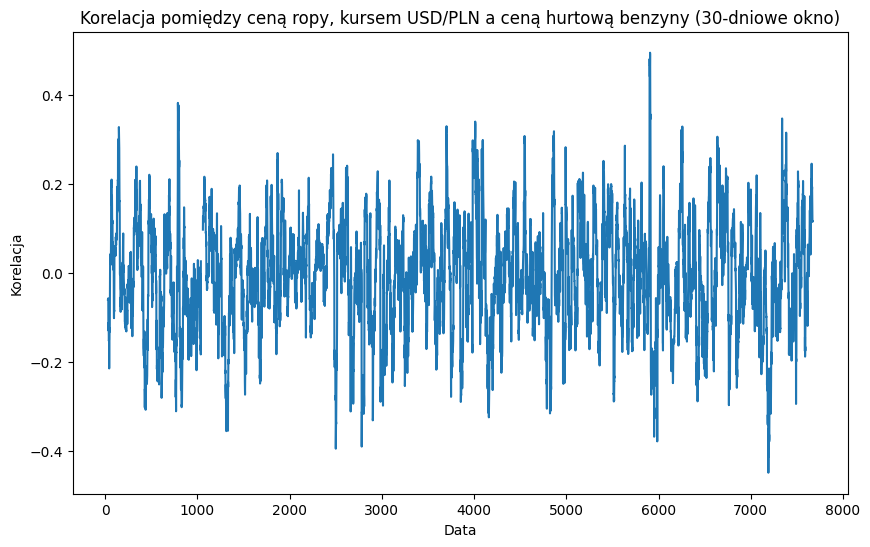

In [40]:
import matplotlib.pyplot as plt

correlation_series.plot(figsize=(10, 6))
plt.title('Korelacja pomiędzy ceną ropy, kursem USD/PLN a ceną hurtową benzyny (30-dniowe okno)')
plt.xlabel('Data')
plt.ylabel('Korelacja')
plt.show()